In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import pandas as pd

In [5]:
DATA_PATH = 'Inclusion_Financiera.csv'
data = pd.read_csv(DATA_PATH)

In [6]:
data.head()


,TIPO DE ENTIDAD,CODIGO DE LA ENTIDAD,NOMBRE DE LA ENTIDAD,FECHA DE CORTE,UNIDAD DE CAPTURA,DEPARTAMENTO,RENGLON,MUNICIPIO,TIPO,NRO CORRESPONSALES PROPIOS,...,NRO MICROCREDITO> 10SMMLV HASTA 25SMMLV,MONTO MICROCREDI> 10SMMLV HASTA 25SMMLV,NRO MICROCREDITO MUJERES,MONTO MICROCREDITO MUJERES,NRO MICROCREDITO HOMBRES,MONTO MICROCREDITO HOMBRES,NRO TOTAL MICROCREDITO,MONTO TOTAL MICROCREDITO,NRO PROD DEPOSITO NIVEL NACIONAL,MONTO PROD DEPOSITO NIVEL NACIONAL
0,1,39,Banco Davivienda,31/12/2017,1,ANTIOQUIA,847,URRAO,TRANS Y TRAMITES EN CORRESPONSALES,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
1,1,9,Citibank,31/12/2017,1,ANTIOQUIA,209,CONCORDIA,TRANS Y TRAMITES EN CORRESPONSALES,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
2,1,1,Banco De Bogota,31/12/2017,1,ANTIOQUIA,360,ITAGUI,CREDITO DE VIVIENDA,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
3,1,58,Coopcentral,31/12/2017,1,ANTIOQUIA,1,MEDELLIN,MICROCREDITO,0,...,0,0.0,0,0.0,1,29000000.0,1,29000000.0,0.0,0.0
4,1,52,Bancamía S.A.,31/12/2017,1,ANTIOQUIA,649,SAN CARLOS,CORRESPONSALES,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603232 entries, 0 to 603231
Data columns (total 87 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   TIPO DE ENTIDAD                           603232 non-null  int64  
 1   CODIGO DE LA  ENTIDAD                     603232 non-null  int64  
 2   NOMBRE DE LA  ENTIDAD                     603232 non-null  object 
 3   FECHA DE CORTE                            603232 non-null  object 
 4   UNIDAD DE CAPTURA                         603232 non-null  int64  
 5   DEPARTAMENTO                              603232 non-null  object 
 6   RENGLON                                   603232 non-null  int64  
 7   MUNICIPIO                                 603232 non-null  object 
 8   TIPO                                      598100 non-null  object 
 9   NRO CORRESPONSALES PROPIOS                603232 non-null  int64  
 10  NRO CORRESPONSALES T

In [8]:
columnaPagos = data['NRO PAGOS'] = data['NRO PAGOS'].astype(str)


In [9]:
#variablespredictoras
X = data.iloc[:,17:21]

#variable a predecir
Y = data.iloc[:,19]

#mostramos las 5 primeras filas
X.head()

,NRO GIROS RECIBIDOS,MONTO GIROS RECIBIDOS,NRO PAGOS,MONTO PAGOS
0,0,0,49.0,14862557.0
1,0,0,103.0,13944143.0
2,0,0,0.0,0.0
3,0,0,0.0,0.0
4,0,0,0.0,0.0


In [10]:
from sklearn.model_selection import train_test_split

#X_train y Y_train para entrenamiento
#Y_test y Y_test para prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=0)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422262 entries, 359560 to 305711
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   NRO GIROS RECIBIDOS    422262 non-null  int64  
 1   MONTO GIROS RECIBIDOS  422262 non-null  int64  
 2   NRO PAGOS              422262 non-null  object 
 3   MONTO PAGOS            422262 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 16.1+ MB


In [12]:
#cargamos libreria Decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier

#### Creamos el modelo del árbol de decisión

In [13]:
#Llamamos al constructor del arbol de decisión
arbol = DecisionTreeClassifier(max_depth=4)

In [14]:
#entramos al modelo
arbol_montoMicrocredito = arbol.fit(X_train, Y_train)

In [15]:
#Graficamos el árbol de decisión
## Notas: 
### Todas las flechas de lado izqueirdo pertenecen a la respuesta "verdadero" y las del derecho a las respuestas " Falso"ArithmeticError

from matplotlib import pyplot as pyplot
from sklearn import tree


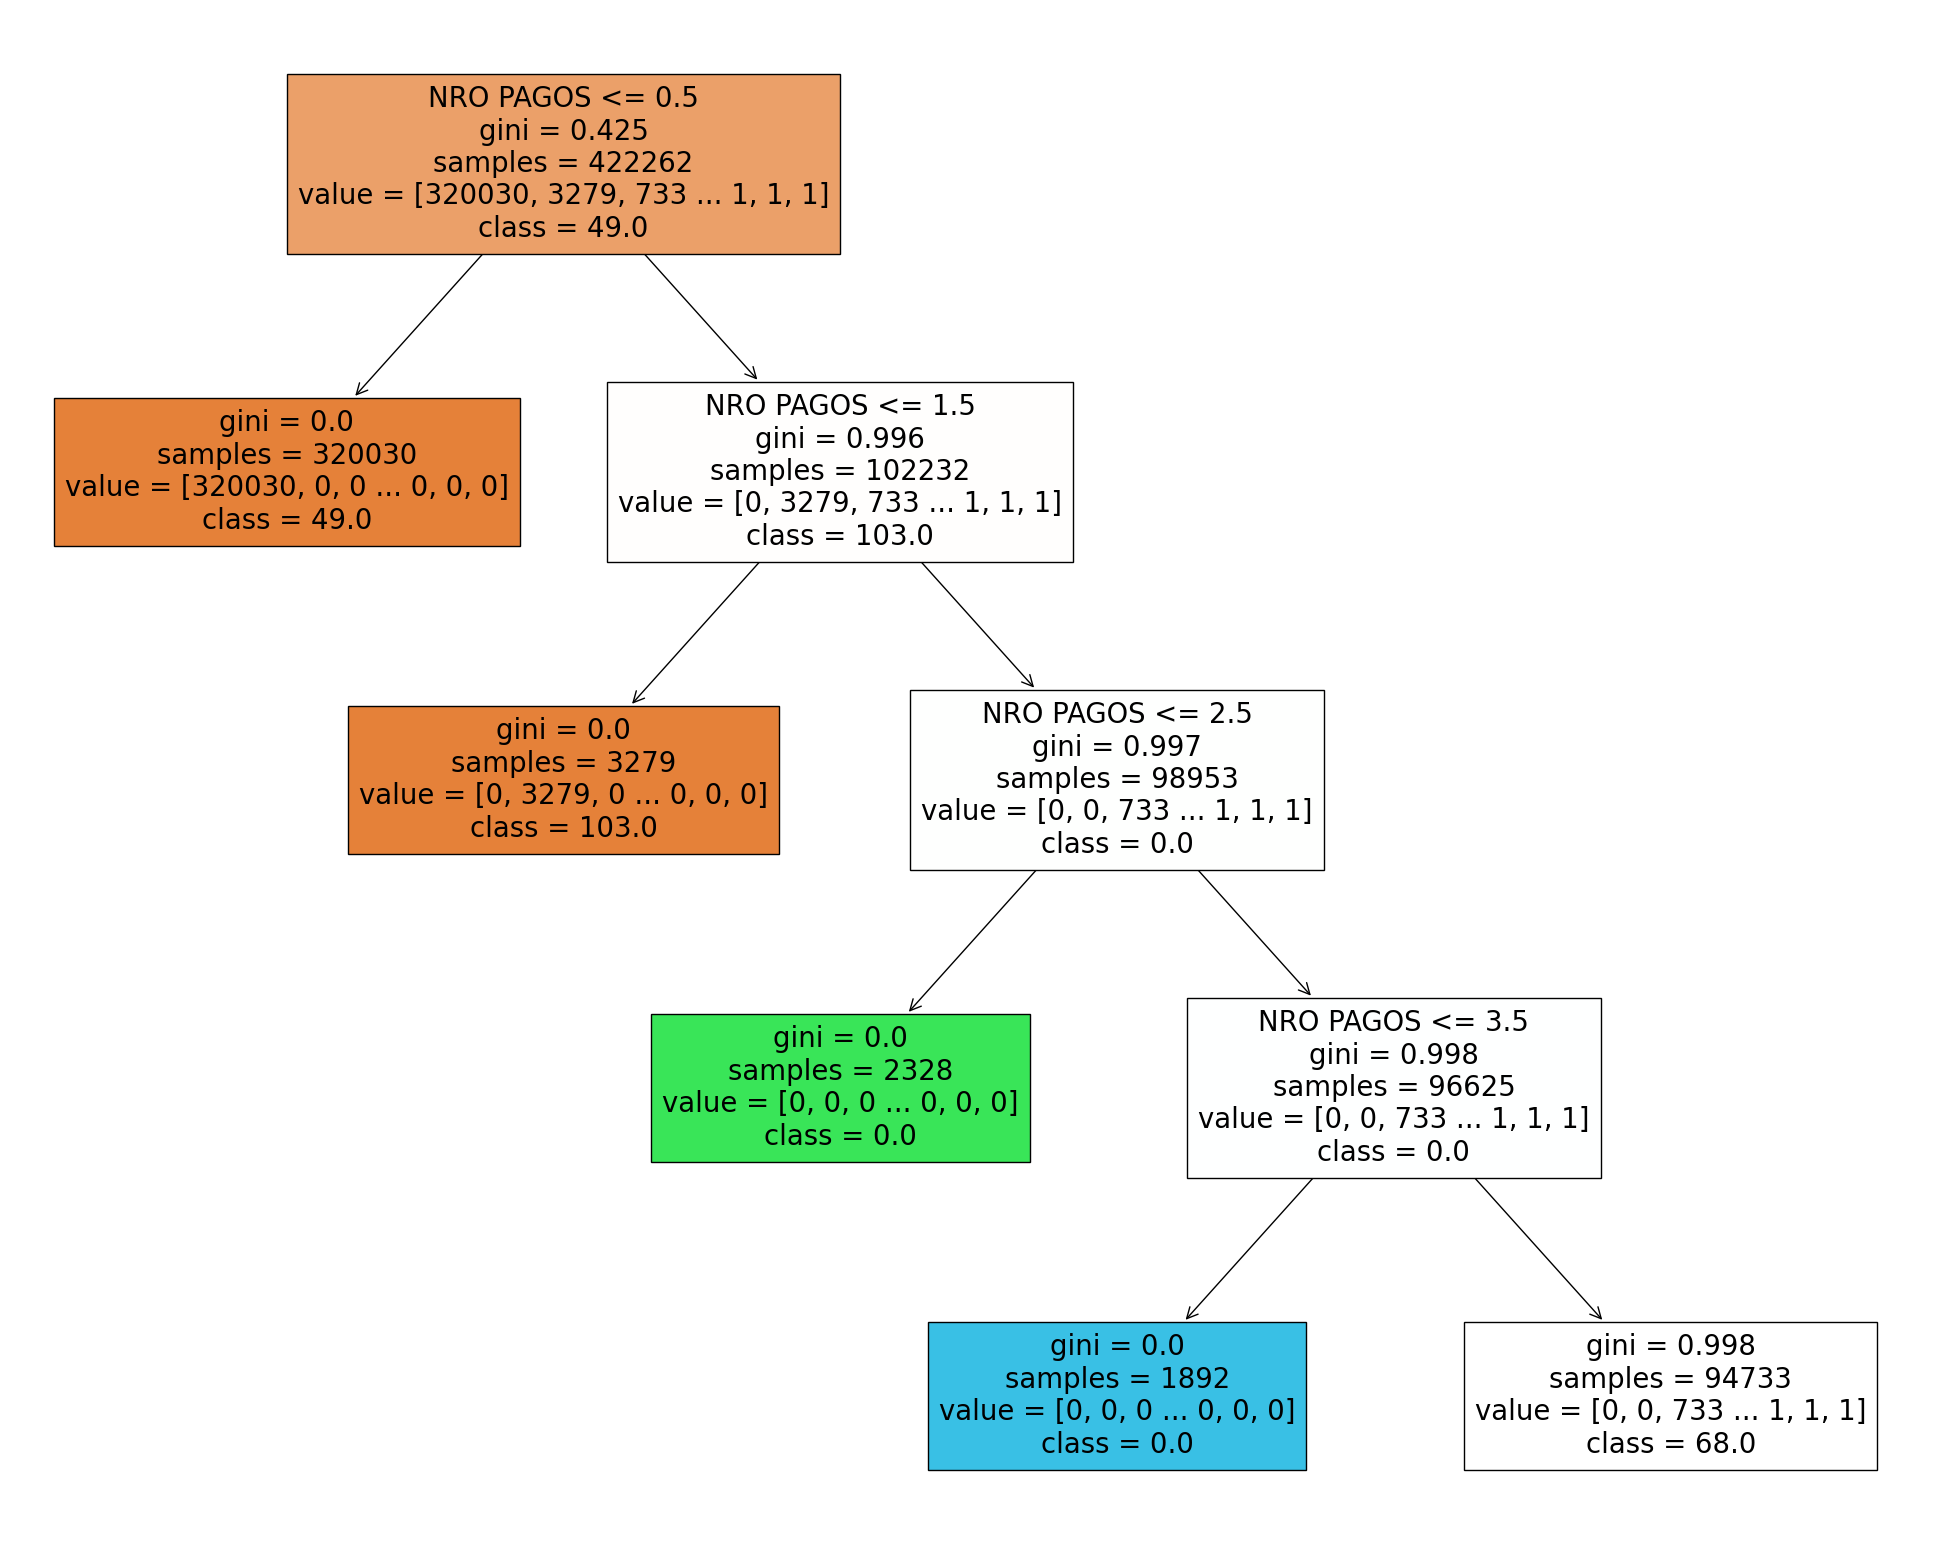

In [16]:
fig = plt.figure(figsize=(25,20))

tree.plot_tree(arbol_montoMicrocredito, feature_names=list(X.columns.values), class_names=list(Y.values), filled=True)

plt.show()

In [17]:
#guardamos el grafico
fig.savefig("arbol de decision.png")

In [18]:
#ejecutar la predicción  con los datos contenidos en la tabla testing

Y_pred = arbol_montoMicrocredito.predict(X_test)


In [19]:
#muestreme las etiquetas que asigno a la predicción
Y_pred

array(['0.0', '0.0', '4.0', ..., '0.0', '4.0', '4.0'], dtype=object)

In [20]:
#calcular la precisión del modelo creando una matriz de cnfusión
from sklearn.metrics import confusion_matrix

Matriz_de_confusion= confusion_matrix(Y_test, Y_pred)

#Matriz_de_confusion


array([[137339,      0,      0, ...,      0,      0,      0],
       [     0,   1385,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0],
       ...,
       [     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0]], dtype=int64)

In [24]:
dataframe = pd.DataFrame(Matriz_de_confusion)

# crear mapa de calor dibujar mapa de calor
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [21]:
#calculamos la precisión del modelo

import numpy as np

precision_global = np.sum(Matriz_de_confusion.diagonal())/ np.sum(Matriz_de_confusion)
precision_global

0.7795048903133116

In [22]:
#Calculamos la precisión por cada clase para saber si el modelo es bueno
precision_No = ((Matriz_de_confusion[0,0]))/sum(Matriz_de_confusion[0,])
precision_No

1.0

In [23]:
precision_Si = ((Matriz_de_confusion[1,1]))/sum(Matriz_de_confusion[1,])
precision_Si

1.0

### Conclusión

En conclusión, la matriz de confusión obtenida a partir de la base de datos de usuarios de la población colombiana muestra una clara relación entre el nivel de bancarización y la efectividad en los cobros y recuperación de cartera bancaria. Los resultados indican que, a medida que aumenta la accesibilidad a los bancos y el nivel de bancarización de los usuarios, se observa un aumento en los montos y tickets de cobro, lo que sugiere una mayor eficiencia en la gestión de pagos y una menor probabilidad de incumplimiento de los usuarios. Por lo tanto, estos hallazgos pueden ser útiles para los bancos y otras instituciones financieras en Colombia para diseñar estrategias que fomenten la bancarización y mejoren la gestión de cobros y recuperación de cartera. No obstante, es importante tener en cuenta que cualquier estrategia debe ser diseñada y aplicada con precaución, teniendo en cuenta las limitaciones de los datos y la complejidad del mercado financiero.